# Avocado Price Forecasts

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from fbprophet import Prophet


In [50]:
#Loading all the csv files
df = pd.read_csv("avocado.csv")

In [109]:
df1=df.drop(['Unnamed: 0'],axis=1)

In [110]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Conventional vs Organic Avocadoes:

In [111]:
df1['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



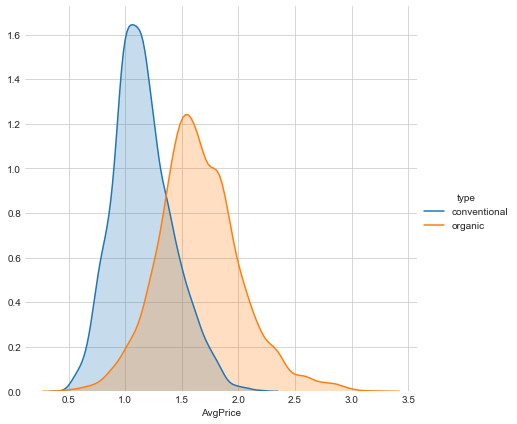

In [112]:
sns.set_style('whitegrid')
g=sns.FacetGrid(df1,hue='type',size=6)
g.map(sns.kdeplot,'AveragePrice',shade=True)
g.add_legend()
plt.xlabel('AvgPrice')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [ ]:
#Function for selecting region and type
def reg(r,t):
    dfs = df1[(df1.region ==r) & (df1.type == t) ]
    dfs1=dfs.set_index('Date')
    return dfs1   

All the analysis that follows is for the region and type selected in the below cell.

Enter below the Region and Type of the Avocado:

In [188]:
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime
df2=reg('TotalUS','conventional')  #<<<<-------------Enter the region and type here----------------->>>>


# Distribution of Avg Price over time :

In [189]:
trace = go.Scatter(
    x = df2.index,
    y = df2.AveragePrice,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data,filename='basicscatter')

# Average Price Distribution : 

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



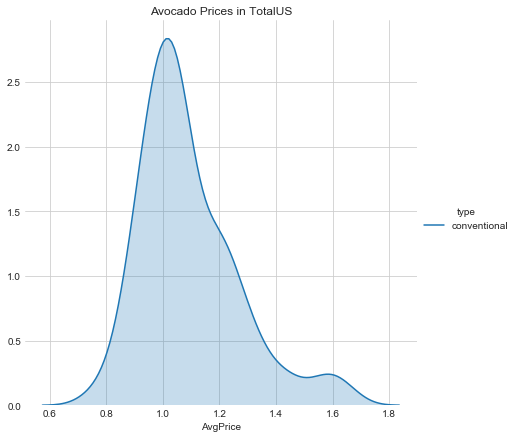

In [182]:
sns.set_style('whitegrid')
g=sns.FacetGrid(df2,hue='type',size=6)
g.map(sns.kdeplot,'AveragePrice',shade=True)
g.add_legend()
plt.xlabel('AvgPrice')
plt.title('Avocado Prices in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

# Forecasting the future prices of Avocado (Using FBPROPHET)

In [190]:
df2.reset_index(inplace=True) #Removing the datetime index

In [265]:
date_price = df2.rename(columns={'Date':'ds', 'AveragePrice':'y'})


Fitting the model Using Prophet: 

In [192]:
m = Prophet()
m.fit(date_price)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Shreyansh\New folder\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



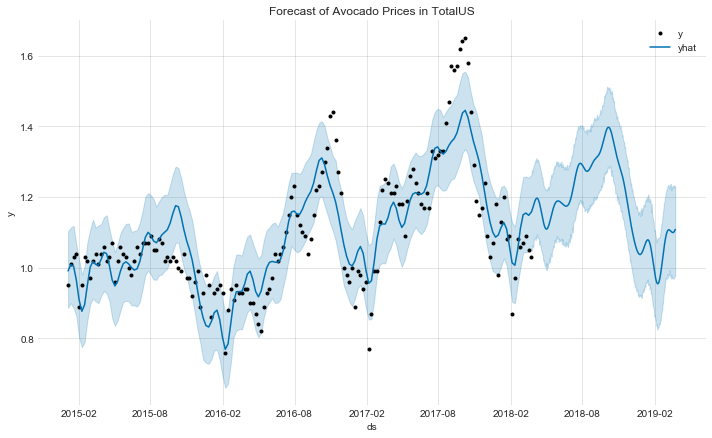

In [193]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.legend()
plt.title('Forecast of Avocado Prices in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In the above figure 'yhat' is the forecasted Avocado Prices in the year 2019

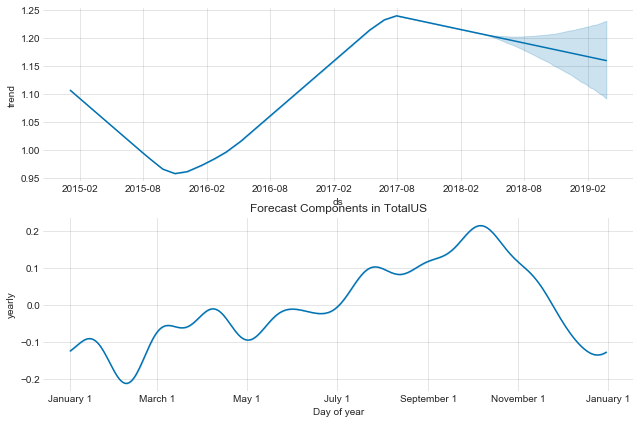

In [194]:
fig2 = m.plot_components(forecast)
plt.title('Forecast Components in '+ df2.region[0])
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

                                                                                                       ---References : Kaggle

In [195]:
df2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS


In [238]:
df3=df2.drop(['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region'],axis=1)
df3.head()

,Date,AveragePrice
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


In [247]:
df3.set_index('Date',inplace=True)

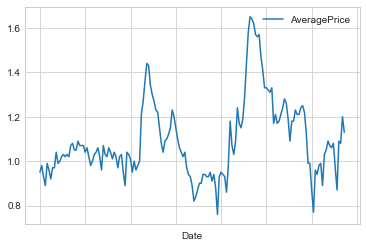

In [248]:
df3.plot()

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.

C:\Users\Shreyansh\New folder\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.



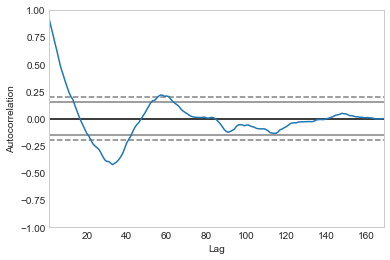

In [252]:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
autocorrelation_plot(df3)
plt.show()

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



                             ARIMA Model Results                              
Dep. Variable:         D.AveragePrice   No. Observations:                  168
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 217.668
Method:                       css-mle   S.D. of innovations              0.066
Date:                Fri, 17 Aug 2018   AIC                           -421.337
Time:                        10:06:09   BIC                           -399.469
Sample:                    12-20-2015   HQIC                          -412.462
                         - 01-07-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0011      0.005      0.198      0.843      -0.010       0.012
ar.L1.D.AveragePrice     0.0287      0.077      0.371      0.711      -0.123       0.180
ar.L2.D.Aver

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



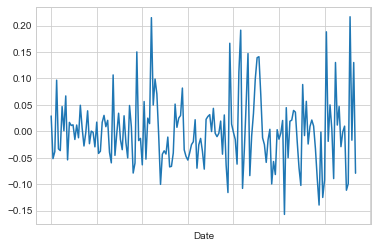

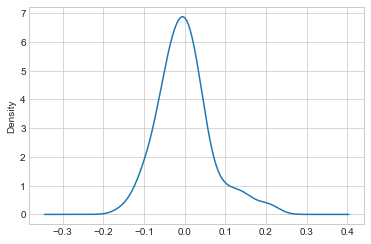

count    168.000000
mean       0.000006
std        0.066429
min       -0.157380
25%       -0.040868
50%       -0.003824
75%        0.029482
max        0.216820
dtype: float64


In [256]:
model = ARIMA(df3, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = (model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [283]:
from sklearn.metrics import mean_squared_error
X = df3.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

C:\Users\Shreyansh\New folder\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Test MSE: 0.007


In [282]:
# predictions

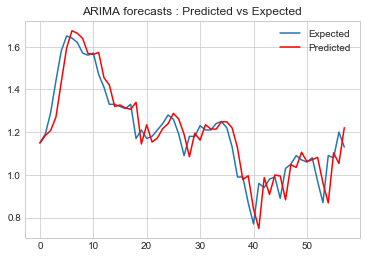

In [284]:
plt.plot(test,label='Expected')
plt.plot(predictions, color='red',label='Predicted')
# plt.plot(forecast['yhat'],label='fbprophet')
plt.title('ARIMA forecasts : Predicted vs Expected')
plt.legend()
plt.show()